## EDA of each of the years 'xxxx_Detils.xlsx' can be done in the same way as the following notebook shows as there is minimal difference in the xlsx. The only notable difference is for some of the years we have worked hours given in a format like this '0745' which needs to be converted into a decimal format which is shown by the code in the last cell of this notebook. 

# 2012

In [1]:
 import pandas as pd

# Provide the file path
file_path = '2012_Details.xlsx'

# Read the Excel file into a Pandas DataFrame
df = pd.read_excel(file_path)
df.head()


,Job No.,Emp. ID,Employee,Rank,Location,Detail\nDate,Start\nTime,End \nTime,Hours\nWorked,Hours\nPaid,Type,Customer No.,Customer,Address,City/State/Zip
0,54854,10249,"CLARK,ROBERT M",9,TREMONT\SCHOOL,2012-12-03,830,1430,6.0,8,Z,1103,VERIZON,649 SUMMER ST.,BOSTON MA 02210
1,54871,10799,"DIRIENZO,ROBERT",9,BEACON\TREMONT,2012-12-06,830,1430,6.0,8,Z,1103,VERIZON,649 SUMMER ST.,BOSTON MA 02210
2,50025,7469,"REED,WALTER R",9,HARRISN AV,2012-11-26,830,1430,6.0,8,Z,1103,VERIZON,649 SUMMER ST.,BOSTON MA 02210
3,51064,10397,"DONOVAN,TIMOTHY R",9,HARRISN AV T,2012-11-27,830,1430,6.0,8,Z,1103,VERIZON,649 SUMMER ST.,BOSTON MA 02210
4,52131,11319,"HAYWARD,PAUL E.",9,SCHOOL\TREMONT,2012-11-28,930,1430,5.0,8,Z,1103,VERIZON,649 SUMMER ST.,BOSTON MA 02210


In [2]:
column_names = df.columns.tolist()
print(column_names)

['Job No.', 'Emp. ID', 'Employee', 'Rank', 'Location', 'Detail\nDate', 'Start\nTime', 'End \nTime', 'Hours\nWorked', 'Hours\nPaid', 'Type', 'Customer No.', 'Customer', 'Address', 'City/State/Zip']


## Converting the names of the dataframe to a consistent version without \n's

In [3]:
column_name_mapping = {
    'Job No.': 'Job_no',
    'Emp. ID': 'Emp_ID',
    'Detail\nDate': 'Detail_Date',
    'Start\nTime': 'Start_Time',
    'End \nTime': 'End_Time',
    'Hours\nWorked': 'Hours_Worked',
    'Hours\nPaid': 'Hours_Paid',
    'Customer No.': 'Customer_no'   
}

df.rename(columns=column_name_mapping, inplace=True)
df.head()

,Job_no,Emp_ID,Employee,Rank,Location,Detail_Date,Start_Time,End_Time,Hours_Worked,Hours_Paid,Type,Customer_no,Customer,Address,City/State/Zip
0,54854,10249,"CLARK,ROBERT M",9,TREMONT\SCHOOL,2012-12-03,830,1430,6.0,8,Z,1103,VERIZON,649 SUMMER ST.,BOSTON MA 02210
1,54871,10799,"DIRIENZO,ROBERT",9,BEACON\TREMONT,2012-12-06,830,1430,6.0,8,Z,1103,VERIZON,649 SUMMER ST.,BOSTON MA 02210
2,50025,7469,"REED,WALTER R",9,HARRISN AV,2012-11-26,830,1430,6.0,8,Z,1103,VERIZON,649 SUMMER ST.,BOSTON MA 02210
3,51064,10397,"DONOVAN,TIMOTHY R",9,HARRISN AV T,2012-11-27,830,1430,6.0,8,Z,1103,VERIZON,649 SUMMER ST.,BOSTON MA 02210
4,52131,11319,"HAYWARD,PAUL E.",9,SCHOOL\TREMONT,2012-11-28,930,1430,5.0,8,Z,1103,VERIZON,649 SUMMER ST.,BOSTON MA 02210


## Calculating the total overpaid hours and the average rank of the officer in the dataset. Then, we multiply the total overpaid hours with the average salary of the average rank that we find earlier

In [4]:
df['Overpaid_Hours'] = df['Hours_Paid'] - df['Hours_Worked']
total_difference = df['Overpaid_Hours'].sum()
print("Total overpaid hours:", total_difference)

average_rank = df['Rank'].mean()
print("Average Rank:", int(average_rank))

Total overpaid hours: 147413.13
Average Rank: 8


#### To find the average pay of a rank 8 officer we go through the '2022-FULL_Detail_B000400-020823' file and for every instance of a rank 8 officer we are summing up the pay_rate and then finding the average pay of a rank 8 officer

In [5]:
file_path = '2022-FULL_Detail_B000400-020823.xlsx'

# Read the Excel file into a Pandas DataFrame
df2 = pd.read_excel(file_path)
#df2.head()
# column_names = df2.columns.tolist()
# print(column_names)
# Step 1: Filter the DataFrame for rank 8 officers
rank_8_df = df2[df2['Emp_Rank'] == 8]

# Step 2: Sum up the pay_rate for rank 8 officers
total_pay = rank_8_df['Pay_Rate'].sum()

# Step 3: Calculate the average pay for rank 8 officers
num_rank_8_officers = len(rank_8_df)
average_pay_rank_8 = total_pay / num_rank_8_officers

# Now, 'average_pay_rank_8' contains the average pay of rank 8 officers in your dataset
print("Average Pay of Rank 8 Officers:", average_pay_rank_8)

Average Pay of Rank 8 Officers: 46.0


In [7]:
Overpaid_money_2012 = float(average_pay_rank_8 * total_difference)
print("The amount of overpaid money:", Overpaid_money_2012, "$")

The amount of overpaid money: 6781003.98 $


### Therefore, from this analysis of financial excess of BPD spending we can conclude about the amount of money the state would save in the year of 2012 if the police officers were paid according to their actual worked hours(note this does not take inflation into account, as we calculate the avg salary from the 2022 dataset), which amounts to SIX MILLION SEVEN HUNDRED EIGHTY-ONE THOUSAND THREE

## Getting insights on which areas based on street names mostly call for overtime services

/var/folders/ry/qqr3x9d55rb8tlz6m6vx0jmc0000gn/T/ipykernel_66477/2674938308.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Street Name'] = df['Address'].str.replace(r'^\d+\s', '')


Top 5 street names with a count of the times an offcer has done overtime:
P.O. BOX 220801    15704
P.O. BOX 250       13870
SYLVAN ROAD         5462
ALLERTON ST.        5313
P.O. BOX 245        3662
Name: Street Name, dtype: int64


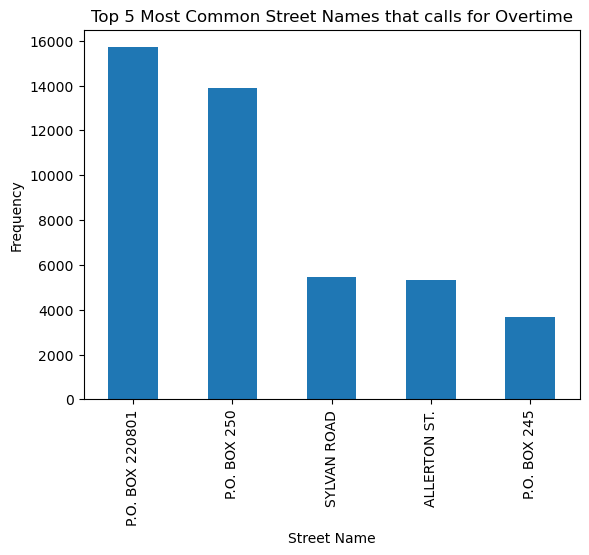

In [8]:
import matplotlib.pyplot as plt

# Step 1: Extract street names by removing the initial numbers
df['Street Name'] = df['Address'].str.replace(r'^\d+\s', '')
#df['Street Name'].head()

# Step 2: Count the occurrences of each street name
street_name_counts = df['Street Name'].value_counts()

# Step 3: Sort street names by count in descending order
top_5_streets = street_name_counts.head(5)

# Step 4: Display the top 5 most common street names
print("Top 5 street names with a count of the times an offcer has done overtime:")
print(top_5_streets)

top_5_streets.plot(kind='bar')
plt.title("Top 5 Most Common Street Names that calls for Overtime")
plt.xlabel("Street Name")
plt.ylabel("Frequency")
plt.show()


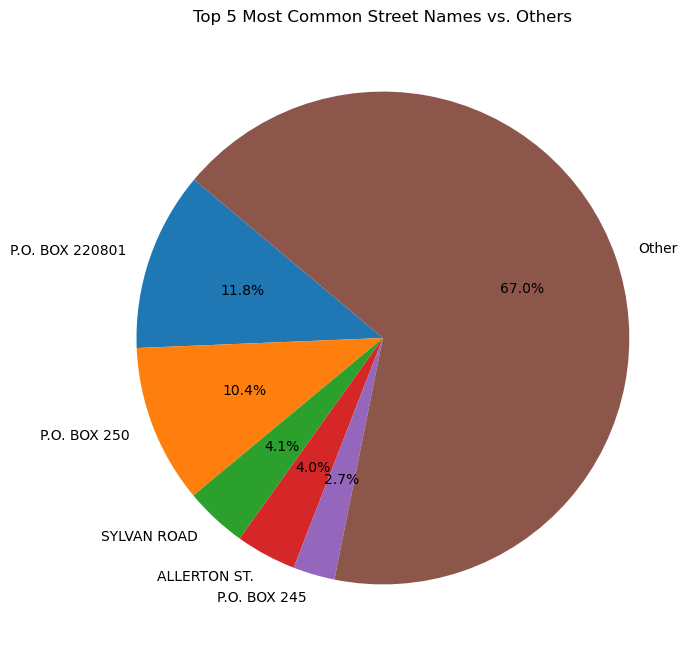

In [9]:
# Create a DataFrame with the top 5 streets and their counts
top_5_df = pd.DataFrame({'Street Name': top_5_streets.index, 'Frequency': top_5_streets.values})

# Calculate the sum of frequencies for the rest of the streets
rest_frequency = street_name_counts[5:].sum()

# Create a DataFrame for the rest of the streets
rest_df = pd.DataFrame({'Street Name': 'Other', 'Frequency': [rest_frequency]})

# Concatenate the top 5 and 'Other' DataFrames
combined_df = pd.concat([top_5_df, rest_df])

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(combined_df['Frequency'], labels=combined_df['Street Name'], autopct='%1.1f%%', startangle=140)
plt.title("Top 5 Most Common Street Names vs. Others")
plt.show()

## Finding the names of the officers who have worked for less hours but paid more.

In [11]:
total_overpaid_hours = df.groupby('Employee')['Overpaid_Hours'].sum()

# Sort the officers by the total overpaid hours in descending order
top_5_overpaid_officers = total_overpaid_hours.sort_values(ascending=False).head(5)

# Print the names of the 5 most overpaid officers
print("The overpaid hours of the top 5 most overpaid officers:")
print(top_5_overpaid_officers)

The overpaid hours of the top 5 most overpaid officers:
Employee
BURCH,CHARLES K.       826.77
FITZPATRICK,DENIS J    641.50
RUSSELL,PATRICK        632.37
CHEN,WILLIAM L         601.77
DORCH,KENNETH C        549.25
Name: Overpaid_Hours, dtype: float64


In [16]:
df.head()

,Job_no,Emp_ID,Employee,Rank,Location,Detail_Date,Start_Time,End_Time,Hours_Worked,Hours_Paid,Type,Customer_no,Customer,Address,City/State/Zip,Overpaid_Hours,Street Name
0,54854,10249,"CLARK,ROBERT M",9,TREMONT\SCHOOL,2012-12-03,830,1430,6.0,8,Z,1103,VERIZON,649 SUMMER ST.,BOSTON MA 02210,2.0,SUMMER ST.
1,54871,10799,"DIRIENZO,ROBERT",9,BEACON\TREMONT,2012-12-06,830,1430,6.0,8,Z,1103,VERIZON,649 SUMMER ST.,BOSTON MA 02210,2.0,SUMMER ST.
2,50025,7469,"REED,WALTER R",9,HARRISN AV,2012-11-26,830,1430,6.0,8,Z,1103,VERIZON,649 SUMMER ST.,BOSTON MA 02210,2.0,SUMMER ST.
3,51064,10397,"DONOVAN,TIMOTHY R",9,HARRISN AV T,2012-11-27,830,1430,6.0,8,Z,1103,VERIZON,649 SUMMER ST.,BOSTON MA 02210,2.0,SUMMER ST.
4,52131,11319,"HAYWARD,PAUL E.",9,SCHOOL\TREMONT,2012-11-28,930,1430,5.0,8,Z,1103,VERIZON,649 SUMMER ST.,BOSTON MA 02210,3.0,SUMMER ST.


## Getting the names and ranks of the top 20 most overpaid officers along with their proportions

In [19]:
import pandas as pd

# Assuming df is your DataFrame
total_overpaid_hours = df.groupby('Employee')['Overpaid_Hours'].sum()

top_20_overpaid_officers = total_overpaid_hours.sort_values(ascending=False).head(20)

print("The overpaid hours and ranks of the top 20 most overpaid officers:")
for employee, overpaid_hours in top_20_overpaid_officers.items():
    # Find the rank of the current officer
    rank = df.loc[df['Employee'] == employee, 'Rank'].values[0]
    
    # Print the information
    print(f"{employee}: Rank {rank}, Overpaid Hours {overpaid_hours}")

# Calculate total overtime hours for each rank in the entire dataset
total_overtime_by_rank = df.groupby('Rank')['Overpaid_Hours'].sum()

# Print the total overtime hours for each rank
print("\nTotal Overtime Hours by Rank:")
for rank, total_hours in total_overtime_by_rank.items():
    print(f"Rank {rank}: Total Overtime Hours {total_hours}")


The overpaid hours and ranks of the top 20 most overpaid officers:
BURCH,CHARLES K.: Rank 9, Overpaid Hours 826.77
FITZPATRICK,DENIS J: Rank 9, Overpaid Hours 641.5
RUSSELL,PATRICK: Rank 9, Overpaid Hours 632.37
CHEN,WILLIAM L: Rank 9, Overpaid Hours 601.77
DORCH,KENNETH C: Rank 8, Overpaid Hours 549.25
KWONG,BRUCE: Rank 9, Overpaid Hours 535.6
DOYLE,MICHAEL: Rank 9, Overpaid Hours 525.54
REANEY,BRIAN J: Rank 9, Overpaid Hours 520.25
KELLEY,ALLAN G.: Rank 9, Overpaid Hours 509.75
FIGUEROA,ROBERT F: Rank 9, Overpaid Hours 485.5
CARNELL,JAMES M: Rank 9, Overpaid Hours 473.34
HAUGH,JOSEPH: Rank 9, Overpaid Hours 466.06
HOSEIN,HASEEB: Rank 5, Overpaid Hours 465.71999999999997
NEE,MICHAEL R: Rank 9, Overpaid Hours 461.5
BLICKER,CHARLES R.: Rank 9, Overpaid Hours 460.75
CHIN,CARY: Rank 8, Overpaid Hours 457.85
FULLAM,DANIEL J: Rank 9, Overpaid Hours 456.24
VASQUEZ,LOUIS A: Rank 9, Overpaid Hours 453.45
LEE,WAIMAN: Rank 8, Overpaid Hours 440.33
BURWELL,CLEVELAND A: Rank 9, Overpaid Hours 439.

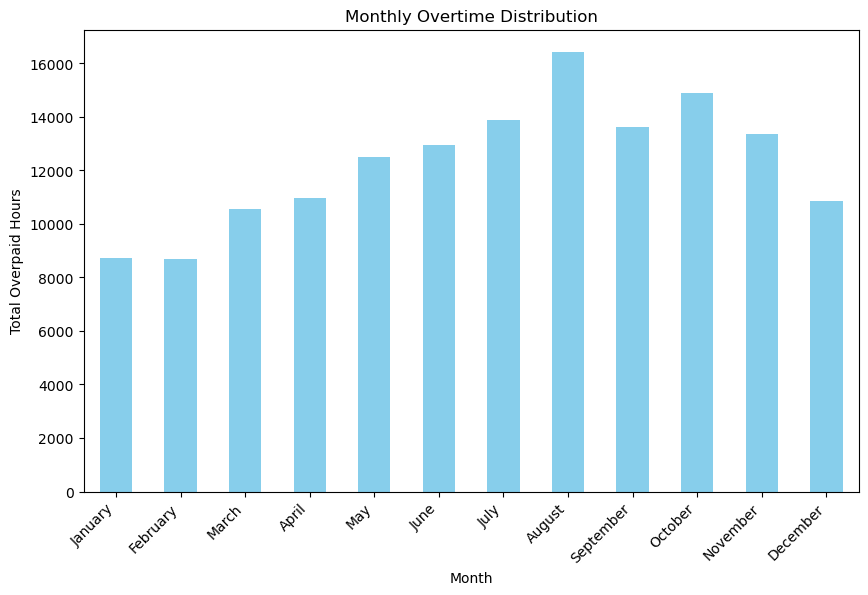

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
df['Detail_Date'] = pd.to_datetime(df['Detail_Date'])  # Convert 'Detail_Date' to datetime

# Extract month names from 'Detail_Date'
df['Month'] = df['Detail_Date'].dt.month_name()

# Group by month and sum the overpaid hours
monthly_overtime_distribution = df.groupby('Month')['Overpaid_Hours'].sum()

# Reorder the months
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
monthly_overtime_distribution = monthly_overtime_distribution.reindex(month_order, fill_value=0)

# Plot the distribution
plt.figure(figsize=(10, 6))
monthly_overtime_distribution.plot(kind='bar', color='skyblue')
plt.title('Monthly Overtime Distribution')
plt.xlabel('Month')
plt.ylabel('Total Overpaid Hours')
plt.xticks(rotation=45, ha='right')
plt.show()


# 2013

In [1]:
 import pandas as pd

# Provide the file path
file_path = '2013_Details.xlsx'

# Read the Excel file into a Pandas DataFrame
df = pd.read_excel(file_path)
df.head()


,Job No.,Emp. ID,Employee,Rank,Location,Detail\nDate,Start\nTime,End \nTime,Hours\nWorked,Hours\nPaid,Type,Customer No.,Customer,Address,City/State/Zip
0,11490,53805,"MCCARTHY,DENIS K",9,COMMONWEALTH AV,2013-11-13 00:00:00,0,530,5.5,8,Z,1103,VERIZON,649 SUMMER ST.,BOSTON MA 02210
1,11528,12011,"BAUSEMER,DANIEL P",9,COMMONWEALTH AV,2013-11-15 00:00:00,0,530,5.5,8,Z,1103,VERIZON,649 SUMMER ST.,BOSTON MA 02210
2,11528,53805,"MCCARTHY,DENIS K",9,COMMONWEALTH AV,2013-11-15 00:00:00,0,530,5.5,8,Z,1103,VERIZON,649 SUMMER ST.,BOSTON MA 02210
3,11500,11165,"ARAICA,HENRY A",9,TALBOT AV,2013-11-15 00:00:00,830,1400,5.5,8,Z,1103,VERIZON,649 SUMMER ST.,BOSTON MA 02210
4,11500,86212,"STEELE,MEL A",9,RIVER ST,2013-11-15 00:00:00,830,1430,6.0,8,Z,1103,VERIZON,649 SUMMER ST.,BOSTON MA 02210


In [3]:
column_name_mapping = {
    'Job No.': 'Job_no',
    'Emp. ID': 'Emp_ID',
    'Detail\nDate': 'Detail_Date',
    'Start\nTime': 'Start_Time',
    'End \nTime': 'End_Time',
    'Hours\nWorked': 'Hours_Worked',
    'Hours\nPaid': 'Hours_Paid',
    'Customer No.': 'Customer_no'   
}

df.rename(columns=column_name_mapping, inplace=True)


In [4]:
df['Overpaid_Hours'] = df['Hours_Paid'] - df['Hours_Worked']
total_difference = df['Overpaid_Hours'].sum()
print("Total overpaid hours:", total_difference)

average_rank = df['Rank'].mean()
print("Average Rank:", int(average_rank))

Total overpaid hours: 160097.98
Average Rank: 8


### We know that the average pay of a rank 8 officer is 46.0$ according to the 2022 full details dataset

In [5]:
average_pay_rank_8 = 46.0

In [7]:
Overpaid_money_2013 = float(average_pay_rank_8 * total_difference)
print("The amount of overpaid money:", Overpaid_money_2013, "$")

The amount of overpaid money: 7364507.08 $


### Therefore, from this analysis of financial excess of BPD spending we can conclude about the amount of money the state would save in the year of 2013 if the police officers were paid according to their actual worked hours(note this does not take inflation into account, as we calculate the avg salary from the 2022 dataset), which amounts to SEVEN MILLION THREE HUNDRED AND SIXTY-FOUR THOUSAND FIVE HUNDRED SEVEN

# 2014

In [16]:
 import pandas as pd

# Provide the file path
file_path = '2014_Details.xlsx'

# Read the Excel file into a Pandas DataFrame
df = pd.read_excel(file_path)
df.head()


,Tracking_No,Emp. ID,Employee,Rank,Street,xStreet,Detail\nDate,Start\nTime,End \nTime,Hours\nWorked,Hours\nPaid,Type,Customer No.,Customer,Customer Address,Customer Address 1,Customer Address 3,Customer_City,Customer_State,Customer_zip
0,1157288,116235,"JOSEPH,GREGORY",9,BLUE HILL AV,NaN,2014-01-01,1200,1600,400,4,S,99164,STOP & SHOP,C/O ASSET PROTECTION,1385 HANCOCK STREET,NaN,QUINCY,MA,02169
1,1157287,95166,"HASAN,JAHAD",9,BLUE HILL AV,NaN,2014-01-01,700,1200,500,5,S,99164,STOP & SHOP,C/O ASSET PROTECTION,1385 HANCOCK STREET,NaN,QUINCY,MA,02169
2,1157281,8730,"MATTHEWS,GREGORY G",9,BLUE HILL AV,NaN,2014-01-01,1600,2130,530,6,S,99164,STOP & SHOP,C/O ASSET PROTECTION,1385 HANCOCK STREET,NaN,QUINCY,MA,02169
3,1166535,116235,"JOSEPH,GREGORY",9,BLUE HILL AV,NaN,2014-01-02,700,1200,500,5,S,99164,STOP & SHOP,C/O ASSET PROTECTION,1385 HANCOCK STREET,NaN,QUINCY,MA,02169
4,1166511,9999,"SANDERS,UNDREY",9,FRANCIS ST,NaN,2014-01-02,730,1530,800,8,R,149,Brigham & Women's Hospital,"10 Vining Street, Room 103",Security Dept; Attn: Karl Skulte,NaN,Boston,MA,02115


In [17]:
column_name_mapping = {
    'Emp. ID': 'Emp_ID',
    'Detail\nDate': 'Detail_Date',
    'Start\nTime': 'Start_Time',
    'End \nTime': 'End_Time',
    'Hours\nWorked': 'Hours_Worked',
    'Hours\nPaid': 'Hours_Paid',
    'Customer No.': 'Customer_no'   
}

df.rename(columns=column_name_mapping, inplace=True)
df['Hours_Worked'] = df['Hours_Worked'] // 100 + (df['Hours_Worked'] % 100) / 60


In [21]:
df['Overpaid_Hours'] = df['Hours_Paid'] - df['Hours_Worked']
total_difference = df['Overpaid_Hours'].sum()
print("Total overpaid hours:", total_difference)

average_rank = df['Rank'].mean()
print("Average Rank:", int(average_rank))

Total overpaid hours: 147171.71666666667
Average Rank: 8


In [22]:
average_pay_rank_8 = 46.0
Overpaid_money_2014 = float(average_pay_rank_8 * total_difference)
print("The amount of overpaid money:", Overpaid_money_2014, "$")

The amount of overpaid money: 6769898.966666667 $


### Therefore, from this analysis of financial excess of BPD spending we can conclude about the amount of money the state would save in the year of 2014 if the police officers were paid according to their actual worked hours(note this does not take inflation into account, as we calculate the avg salary from the 2022 dataset), which amounts to SIX MILLION SEVEN HUNDRED AND SIXTY-NINE THOUSAND EIGHT HUNDRED AND NINETY EIGHT

# 2015

In [23]:
 import pandas as pd

# Provide the file path
file_path = '2015_Details.xlsx'

# Read the Excel file into a Pandas DataFrame
df = pd.read_excel(file_path)
df.head()


,Tracking_No,Emp. ID,Employee,Rank,Street,xStreet,Detail\nDate,Start\nTime,End \nTime,Hours\nWorked,Hours\nPaid,Type,Customer No.,Customer,Customer Address,Customer Address 1,Customer Address 3,Customer_City,Customer_State,Customer_zip
0,1336803,11239,"CALISI,JOHN N",9,LAGRANGE ST,BROOK FARM RD,2015-01-01,1130,1600,430,8,Z,55,Boston Water & Sewer Commission,980 HARRISON AVE,NaN,NaN,BOSTON,MA,02119
1,1336098,10956,"GEE,KENNETH K",9,ALLSTATE RD,NaN,2015-01-01,1630,1900,230,4,S,98845,MARSHALLS,770 COCHITUATE ROAD-MMX LD JYN,NaN,NaN,FRAMINGHAM,MA,01701-9133
2,1324323,8331,"SULLIVAN,PAUL S.",7,SCHROEDER PLAZA,NaN,2015-01-01,730,1600,830,9,Z,99163,BPD - BOSTON POLICE DEPARTMENT - B.F.S.,1 SCHROEDER PLAZA,NaN,NaN,BOSTON,MA,02120
3,1324246,8730,"MATTHEWS,GREGORY G",9,BLUE HILL AV,NaN,2015-01-01,1600,2230,630,8,S,99164,STOP & SHOP,C/O ASSET PROTECTION DEPARTMENT,P.O. BOX 249,1149 HARRISBURG PIKE,CARLISLE,PA,17013
4,1324405,120897,"BURKE,JOHN C",9,FRANCIS ST,NaN,2015-01-02,800,1530,730,8,R,149,Brigham & Women's Hospital,"10 Vining Street, Room 103",Security Dept; Attn: Karl Skulte,NaN,Boston,MA,02115


In [24]:
column_name_mapping = {
    'Emp. ID': 'Emp_ID',
    'Detail\nDate': 'Detail_Date',
    'Start\nTime': 'Start_Time',
    'End \nTime': 'End_Time',
    'Hours\nWorked': 'Hours_Worked',
    'Hours\nPaid': 'Hours_Paid',
    'Customer No.': 'Customer_no'   
}

df.rename(columns=column_name_mapping, inplace=True)
df['Hours_Worked'] = df['Hours_Worked'] // 100 + (df['Hours_Worked'] % 100) / 60


In [26]:
df['Overpaid_Hours'] = df['Hours_Paid'] - df['Hours_Worked']
total_difference = df['Overpaid_Hours'].sum()
print("Total overpaid hours:", total_difference)

average_rank = df['Rank'].mean()
print("Average Rank:", int(average_rank))

Total overpaid hours: 163719.5
Average Rank: 8


In [27]:
average_pay_rank_8 = 46.0
Overpaid_money_2015 = float(average_pay_rank_8 * total_difference)
print("The amount of overpaid money:", Overpaid_money_2015, "$")

The amount of overpaid money: 7531097.0 $


### Therefore, from this analysis of financial excess of BPD spending we can conclude about the amount of money the state would save in the year of 2015 if the police officers were paid according to their actual worked hours(note this does not take inflation into account, as we calculate the avg salary from the 2022 dataset), which amounts to SEVEN MILLION FIVE HUNDRED AND THIRTY-ONE THOUSAND NINETY SEVEN

# 2016

In [28]:
 import pandas as pd

# Provide the file path
file_path = '2016_Details.xlsx'

# Read the Excel file into a Pandas DataFrame
df = pd.read_excel(file_path)
df.head()


,Tracking_No,Emp. ID,Employee,Rank,Street,xStreet,Detail\nDate,Start\nTime,End \nTime,Hours\nWorked,Hours\nPaid,Type,Customer No.,Customer,Customer Address,Customer Address 1,Customer Address 3,Customer_City,Customer_State,Customer_zip
0,1488636,10395.0,"CRIMMINS,STEPHEN G",9,FRANCIS ST,NaN,2016-01-01,730,1530,800,8,S,149,Brigham & Women's Hospital,"10 Vining Street, Room 103",Security Dept; Attn: Karl Skulte,NaN,Boston,MA,02115
1,1500847,103734.0,"AZIZ,MICHAEL",8,WASHINGTON ST,NaN,2016-01-01,2100,130,430,5,S,7643,"Reed,William E Audit",24 Washington Street,NaN,NaN,Dorchester,MA,02121
2,1503907,8678.0,"MILLER,DAVID J",9,ATLANTIC AV,SUMMER ST,2016-01-02,2345,600,615,8,C,95347,Veolia Energy,15 Elkins Street,NaN,NaN,South Boston,MA,02127
3,1495055,91889.0,"EUNIS,GREGORY R.",9,DUNBAR AV,NaN,2016-01-02,2200,200,400,4,S,7600,Unity Sports Cult Club *,10 Dunbar Avenue,NaN,NaN,Dorchester,MA,02124
4,1495138,9014.0,"FREEMAN,JAMES J.",7,BEACON ST,NaN,2016-01-02,1600,1930,330,4,S,121,BOSTON COLLEGE,140 COMMONWEALTH AVENUE,C/O BOSTON COLLEGE POLICE,NaN,CHESTNUT HILL,MA,02467


In [29]:
column_name_mapping = {
    'Emp. ID': 'Emp_ID',
    'Detail\nDate': 'Detail_Date',
    'Start\nTime': 'Start_Time',
    'End \nTime': 'End_Time',
    'Hours\nWorked': 'Hours_Worked',
    'Hours\nPaid': 'Hours_Paid',
    'Customer No.': 'Customer_no'   
}

df.rename(columns=column_name_mapping, inplace=True)
df['Hours_Worked'] = df['Hours_Worked'] // 100 + (df['Hours_Worked'] % 100) / 60


In [31]:
df['Overpaid_Hours'] = df['Hours_Paid'] - df['Hours_Worked']
total_difference = df['Overpaid_Hours'].sum()
print("Total overpaid hours:", total_difference)

average_rank = df['Rank'].mean()
print("Average Rank:", int(average_rank))

Total overpaid hours: 169593.88333333333
Average Rank: 8


In [32]:
average_pay_rank_8 = 46.0
Overpaid_money_2016 = float(average_pay_rank_8 * total_difference)
print("The amount of overpaid money:", Overpaid_money_2016, "$")

The amount of overpaid money: 7801318.633333333 $


### Therefore, from this analysis of financial excess of BPD spending we can conclude about the amount of money the state would save in the year of 2016 if the police officers were paid according to their actual worked hours(note this does not take inflation into account, as we calculate the avg salary from the 2022 dataset), which amounts to SEVEN MILLION EIGHT HUNDRED AND ONE THOUSAND THREE HUNDRED AND EIGHTEEN

# 2017

In [33]:
 import pandas as pd

# Provide the file path
file_path = '2017_Details.xlsx'

# Read the Excel file into a Pandas DataFrame
df = pd.read_excel(file_path)
df.head()


,Tracking_No,Emp. ID,Employee,Rank,Street,xStreet,Detail\nDate,Start\nTime,End \nTime,Hours\nWorked,Hours\nPaid,Type,Customer No.,Customer,Customer Address,Customer Address 1,Customer Address 3,Customer_City,Customer_State,Customer_zip
0,1665469,56516,"BARRETT,DANA S",7,SCHROEDER PLAZA,NaN,2017-01-02,730,1600,830,9,C,99163,BPD - BOSTON POLICE DEPARTMENT - B.F.S.,1 SCHROEDER PLAZA,NaN,NaN,BOSTON,MA,02120
1,1668862,81402,"RODRIGUEZ,FRANCISCO",9,RIVER ST,MAPLE ST,2017-01-01,1200,1630,430,8,C,97297,EVERSOURCE (FORMALLY NSTAR ELECTRIC),PO BOX 2915,NaN,NaN,HARTFORD,CT,06104
2,1665526,91904,"KEY,JOEY C.",9,BLUE HILL AV,NaN,2017-01-02,730,1200,430,5,S,99164,STOP & SHOP,C/O ASSET PROTECTION DEPARTMENT,P.O. BOX 249,1149 HARRISBURG PIKE,CARLISLE,PA,17013
3,1665474,11681,"FELIX,BERLINO",9,FRANCIS ST,NaN,2017-01-02,1600,2345,745,8,S,149,Brigham & Women's Hospital,"10 Vining Street, Room 103",Security Dept; Attn: Karl Skulte,NaN,Boston,MA,02115
4,1665477,10271,"GREEN,JOHN W",9,FRANCIS ST,NaN,2017-01-02,730,1530,800,8,S,149,Brigham & Women's Hospital,"10 Vining Street, Room 103",Security Dept; Attn: Karl Skulte,NaN,Boston,MA,02115


In [34]:
column_name_mapping = {
    'Emp. ID': 'Emp_ID',
    'Detail\nDate': 'Detail_Date',
    'Start\nTime': 'Start_Time',
    'End \nTime': 'End_Time',
    'Hours\nWorked': 'Hours_Worked',
    'Hours\nPaid': 'Hours_Paid',
    'Customer No.': 'Customer_no'   
}

df.rename(columns=column_name_mapping, inplace=True)
df['Hours_Worked'] = df['Hours_Worked'] // 100 + (df['Hours_Worked'] % 100) / 60


In [36]:
df['Overpaid_Hours'] = df['Hours_Paid'] - df['Hours_Worked']
total_difference = df['Overpaid_Hours'].sum()
print("Total overpaid hours:", total_difference)

average_rank = df['Rank'].mean()
print("Average Rank:", int(average_rank))

Total overpaid hours: 189748.66666666666
Average Rank: 8


In [37]:
average_pay_rank_8 = 46.0
Overpaid_money_2017 = float(average_pay_rank_8 * total_difference)
print("The amount of overpaid money:", Overpaid_money_2017, "$")

The amount of overpaid money: 8728438.666666666 $


### Therefore, from this analysis of financial excess of BPD spending we can conclude about the amount of money the state would save in the year of 2017 if the police officers were paid according to their actual worked hours(note this does not take inflation into account, as we calculate the avg salary from the 2022 dataset), which amounts to EIGHT MILLION SEVEN HUNDRED AND TWENTY-EIGHT THOUSAND FOUR HUNDRED AND THIRTY-EIGHT

# 2018

In [38]:
 import pandas as pd

# Provide the file path
file_path = '2018_Details.xlsx'

# Read the Excel file into a Pandas DataFrame
df = pd.read_excel(file_path)
df.head()


,Tracking_No,Emp. ID,Employee,Rank,Street,xStreet,Detail\nDate,Start\nTime,End \nTime,Hours\nWorked,Hours\nPaid,Type,Customer No.,Customer,Customer Address,Customer Address 1,Customer Address 3,Customer_City,Customer_State,Customer_zip
0,1853658,103741,"CHEN,WILLIAM L",9,SUMMER ST,ATLANTIC AV,2018-01-01,1600,2345,745,8,C,95347,VEOLIA ENERGY,15 ELKINS STREET,NaN,NaN,SOUTH BOSTON,MA,02127
1,1847966,10072,"LYONS,WILLIE B",9,FRANCIS ST,NaN,2018-01-01,730,1500,730,8,S,149,Brigham & Women's Hospital,"10 Vining Street, Room 103",Security Dept; Attn: Karl Skulte,NaN,Boston,MA,02115
2,1854342,10731,"MOUSSALLI,ANTHONY J",9,WAVERLY ST,BLUE HILL AV,2018-01-02,1030,1500,430,8,C,416,VERIZON C/O SARAH KASANOVICH,146 LELAND ST,NaN,NaN,FRAMINGHAM,MA,01710
3,1854292,98657,"GORMAN III,JOSEPH P.",9,S HUNTINGTON AV,RIVERWAY,2018-01-02,830,1400,530,8,C,55,Boston Water & Sewer Commission,980 HARRISON AVE,NaN,NaN,BOSTON,MA,02119
4,1847955,8934,"BOYLE,ROBERT C",9,FOREST HILLS ST,NaN,2018-01-01,1930,2330,400,4,S,98837,FORESTVALE APARTMENTS,885 2ND AVENUE 31ST FLOOR STE C,NaN,NaN,NEW YORK,NY,10017


In [40]:
column_name_mapping = {
    'Emp. ID': 'Emp_ID',
    'Detail\nDate': 'Detail_Date',
    'Start\nTime': 'Start_Time',
    'End \nTime': 'End_Time',
    'Hours\nWorked': 'Hours_Worked',
    'Hours\nPaid': 'Hours_Paid',
    'Customer No.': 'Customer_no'   
}

df.rename(columns=column_name_mapping, inplace=True)
df['Hours_Worked'] = df['Hours_Worked'] // 100 + (df['Hours_Worked'] % 100) / 60


In [42]:
df['Overpaid_Hours'] = df['Hours_Paid'] - df['Hours_Worked']
total_difference = df['Overpaid_Hours'].sum()
print("Total overpaid hours:", total_difference)

average_rank = df['Rank'].mean()
print("Average Rank:", int(average_rank))

Total overpaid hours: 157282.18333333335
Average Rank: 8


In [43]:
average_pay_rank_8 = 46.0
Overpaid_money_2018 = float(average_pay_rank_8 * total_difference)
print("The amount of overpaid money:", Overpaid_money_2018, "$")

The amount of overpaid money: 7234980.433333334 $


### Therefore, from this analysis of financial excess of BPD spending we can conclude about the amount of money the state would save in the year of 2018 if the police officers were paid according to their actual worked hours(note this does not take inflation into account, as we calculate the avg salary from the 2022 dataset), which amounts to SEVEN MILLION TWO HUNDRED AND THIRTY-FOUR THOUSAND NINE HUNDRED AND EIGHTY

# 2019

In [44]:
 import pandas as pd

# Provide the file path
file_path = '2019_Details.xlsx'

# Read the Excel file into a Pandas DataFrame
df = pd.read_excel(file_path)
df.head()


,Tracking_No,Emp. ID,Employee,Rank,Street,xStreet,Detail\nDate,Start\nTime,End \nTime,Hours\nWorked,Hours\nPaid,Type,Customer No.,Customer,Customer Address,Customer Address 1,Customer Address 3,Customer_City,Customer_State,Customer_zip
0,2036769,10061,"ESTRELLA,RICHARD",9,ALFORD ST,NaN,2019-01-02,0,700,700,8,C,45167,"SPS New England, Inc",98 Elm Street,NaN,NaN,Salisbury,MA,01952
1,2018247,116235,"JOSEPH,GREGORY",9,BLUE HILL AV,NaN,2019-01-01,700,1200,500,5,S,99164,STOP & SHOP,C/O ASSET PROTECTION DEPARTMENT,P.O. BOX 249,1149 HARRISBURG PIKE,CARLISLE,PA,17013
2,2018217,10955,"GARCIA,FRANCIS N",9,FRANCIS ST,NaN,2019-01-01,830,1530,700,8,S,149,Brigham & Women's Hospital,"10 Vining Street, Room 103",Security Dept; Attn: Karl Skulte,NaN,Boston,MA,02115
3,2018300,12275,"O'NEILL,MARY A.",7,SCHROEDER PLAZA,NaN,2019-01-01,730,1600,830,9,C,99163,BPD - BOSTON POLICE DEPARTMENT - B.F.S.,1 SCHROEDER PLAZA,NaN,NaN,BOSTON,MA,02120
4,2018225,11173,"HARDY,JOHN J",5,SCHROEDER PLAZA,NaN,2019-01-01,730,1600,830,9,C,99163,BPD - BOSTON POLICE DEPARTMENT - B.F.S.,1 SCHROEDER PLAZA,NaN,NaN,BOSTON,MA,02120


In [45]:
column_name_mapping = {
    'Emp. ID': 'Emp_ID',
    'Detail\nDate': 'Detail_Date',
    'Start\nTime': 'Start_Time',
    'End \nTime': 'End_Time',
    'Hours\nWorked': 'Hours_Worked',
    'Hours\nPaid': 'Hours_Paid',
    'Customer No.': 'Customer_no'   
}

df.rename(columns=column_name_mapping, inplace=True)
df['Hours_Worked'] = df['Hours_Worked'] // 100 + (df['Hours_Worked'] % 100) / 60


In [46]:
df['Overpaid_Hours'] = df['Hours_Paid'] - df['Hours_Worked']
total_difference = df['Overpaid_Hours'].sum()
print("Total overpaid hours:", total_difference)

average_rank = df['Rank'].mean()
print("Average Rank:", int(average_rank))

Total overpaid hours: 165731.21666666667
Average Rank: 8


In [47]:
average_pay_rank_8 = 46.0
Overpaid_money_2019 = float(average_pay_rank_8 * total_difference)
print("The amount of overpaid money:", Overpaid_money_2019, "$")

The amount of overpaid money: 7623635.966666667 $


### Therefore, from this analysis of financial excess of BPD spending we can conclude about the amount of money the state would save in the year of 2019 if the police officers were paid according to their actual worked hours(note this does not take inflation into account, as we calculate the avg salary from the 2022 dataset), which amounts to SEVEN MILLION SIX HUNDRED AND TWENTY-THREE THOUSAND SIX HUNDRED AND THIRTY-FIVE

# 2020

In [48]:
 import pandas as pd

# Provide the file path
file_path = '2020_Details.xlsx'

# Read the Excel file into a Pandas DataFrame
df = pd.read_excel(file_path)
df.head()


,Tracking_No,Emp. ID,Employee,Rank,Street,xStreet,Detail\nDate,Start\nTime,End \nTime,Hours\nWorked,Hours\nPaid,Type,Customer No.,Customer,Customer Address,Customer Address 1,Customer Address 3,Customer_City,Customer_State,Customer_zip
0,2206472,11173,"HARDY,JOHN J",5,SCHROEDER PLAZA,NaN,2020-01-01,730,1600,830,9,C,99163,BPD - BOSTON POLICE DEPARTMENT - B.F.S.,1 SCHROEDER PLAZA,NaN,NaN,BOSTON,MA,02120
1,2206484,9755,"HORTON,JOSEPH R",5,SCHROEDER PLAZA,NaN,2020-01-01,730,1600,830,9,C,99163,BPD - BOSTON POLICE DEPARTMENT - B.F.S.,1 SCHROEDER PLAZA,NaN,NaN,BOSTON,MA,02120
2,2206473,11612,"HYNES,JOHN F",7,SCHROEDER PLAZA,NaN,2020-01-01,730,1600,830,9,C,99163,BPD - BOSTON POLICE DEPARTMENT - B.F.S.,1 SCHROEDER PLAZA,NaN,NaN,BOSTON,MA,02120
3,2210577,9997,"ROACH,EDWARD L",9,BUSSEY ST,WALTER ST,2020-01-02,700,1500,800,8,C,99255,A-Plus Construction Services Corp.,17 Accord Park Drive Ste 102,NaN,NaN,Norwell,MA,02061
4,2210799,11200,"CREAVIN,PATRICK J",9,VFW PY,NaN,2020-01-02,800,1430,630,8,C,8352,RCN,956 MASSACHUSETTS AVE,NaN,NaN,ARLINGTON,MA,02476


In [49]:
column_name_mapping = {
    'Emp. ID': 'Emp_ID',
    'Detail\nDate': 'Detail_Date',
    'Start\nTime': 'Start_Time',
    'End \nTime': 'End_Time',
    'Hours\nWorked': 'Hours_Worked',
    'Hours\nPaid': 'Hours_Paid',
    'Customer No.': 'Customer_no'   
}

df.rename(columns=column_name_mapping, inplace=True)
df['Hours_Worked'] = df['Hours_Worked'] // 100 + (df['Hours_Worked'] % 100) / 60


In [50]:
df['Overpaid_Hours'] = df['Hours_Paid'] - df['Hours_Worked']
total_difference = df['Overpaid_Hours'].sum()
print("Total overpaid hours:", total_difference)

average_rank = df['Rank'].mean()
print("Average Rank:", int(average_rank))

Total overpaid hours: 136160.98333333334
Average Rank: 8


In [54]:
average_pay_rank_8 = 46.0
Overpaid_money_2020 = float(average_pay_rank_8 * total_difference)
print("The amount of overpaid money:", Overpaid_money_2020, "$")

The amount of overpaid money: 6263405.233333333 $


### Therefore, from this analysis of financial excess of BPD spending we can conclude about the amount of money the state would save in the year of 2020 if the police officers were paid according to their actual worked hours(note this does not take inflation into account, as we calculate the avg salary from the 2022 dataset), which amounts to SIX MILLION TWO HUNDRED AND SIXTY-THREE THOUSAND FOUR HUNDRED AND FIVE

# 2021

In [58]:
 import pandas as pd

# Provide the file path
file_path = '2021_Details.xlsx'

# Read the Excel file into a Pandas DataFrame
df = pd.read_excel(file_path)
df.head()


/Users/rithikbhandary/anaconda3/lib/python3.10/site-packages/openpyxl/worksheet/_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


,Tracking_No,Emp. ID,Employee,Rank,Street,xStreet,Detail\nDate,Start\nTime,End \nTime,Hours\nWorked,Hours\nPaid,Type,Customer No.,Customer,Customer Address,Customer Address 1,Customer Address 3,Customer_City,Customer_State,Customer_zip
0,2343189,140298,"GARNEY,BRIAN",9,NEW CHARDON ST,NaN,2021-01-02,700,800,100,4,C,2838,"MORIARTY, JOHN & ASSOC",3 CHURCH STREET,NaN,NaN,WINCHESTER,MA,01890
1,2343190,10264,"GAVA,ROY",9,NEW CHARDON ST,NaN,2021-01-02,700,800,100,4,C,2838,"MORIARTY, JOHN & ASSOC",3 CHURCH STREET,NaN,NaN,WINCHESTER,MA,01890
2,2338683,9707,"BOYLE,FREDERICK J",9,LOMASNEY WY,NaN,2021-01-02,700,1200,500,8,C,2602,TISHMAN CONSTRUCTION CORP,1 FEDERAL ST FL 8,NaN,NaN,BOSTON,MA,02110
3,2340857,116235,"JOSEPH,GREGORY",9,LONGWOOD AV,NaN,2021-01-01,800,1530,730,8,S,151,CHILDREN'S HOSPITAL BOSTON,300 LONGWOOD AVENUE,"ATTN:BOB RYAN,SECURITY DEPT",NaN,BOSTON,MA,02115
4,2343951,12253,"BUTLER,BOBBIE",9,BLUE HILL AV,NaN,2021-01-01,900,1500,600,8,C,396,NATIONAL GRID,40 SYLVAN ROAD,ATTN: MARY MULRONEY,NaN,WALTHAM,MA,02451


In [60]:
column_name_mapping = {
    'Emp. ID': 'Emp_ID',
    'Detail\nDate': 'Detail_Date',
    'Start\nTime': 'Start_Time',
    'End \nTime': 'End_Time',
    'Hours\nWorked': 'Hours_Worked',
    'Hours\nPaid': 'Hours_Paid',
    'Customer No.': 'Customer_no'   
}

df.rename(columns=column_name_mapping, inplace=True)
df['Hours_Worked'] = df['Hours_Worked'] // 100 + (df['Hours_Worked'] % 100) / 60


In [62]:
df['Overpaid_Hours'] = df['Hours_Paid'] - df['Hours_Worked']
total_difference = df['Overpaid_Hours'].sum()
print("Total overpaid hours:", total_difference)

average_rank = df['Rank'].mean()
print("Average Rank:", int(average_rank))

Total overpaid hours: 150966.63333333333
Average Rank: 8


In [63]:
average_pay_rank_8 = 46.0
Overpaid_money_2021 = float(average_pay_rank_8 * total_difference)
print("The amount of overpaid money:", Overpaid_money_2021, "$")

The amount of overpaid money: 6944465.133333333 $


### Therefore, from this analysis of financial excess of BPD spending we can conclude about the amount of money the state would save in the year of 2021 if the police officers were paid according to their actual worked hours(note this does not take inflation into account, as we calculate the avg salary from the 2022 dataset), which amounts to SIX MILLION NINE HUNDRED AND FORTY-FOUR THOUSAND FOUR HUNDRED AND SIXTY-FIVE

# 2022

In [64]:
 import pandas as pd

# Provide the file path
file_path = '2022_Detail_through_Paid_Date_08-26-2022.xlsx'

# Read the Excel file into a Pandas DataFrame
df = pd.read_excel(file_path)
df.head()


,Tracking_No,Emp. ID,Employee,Rank,Street,xStreet,Detail\nDate,Start\nTime,End \nTime,Hours\nWorked,Hours\nPaid,Type,Customer No.,Customer,Customer Address,Customer Address 1,Customer Address 3,Customer_City,Customer_State,Customer_zip
0,2495612,148321,"ZOU,ZI",9,CAMBRIDGE ST,NaN,2022-01-02,900,1500,600,8,C,97297,EVERSOURCE ELECTRIC,247 STATION DRIVE,ATTN: JIM DEVEREAUX SUM-NE310,NaN,WESTWOOD,MA,02090
1,2492668,10310,"WALLACE,DANIEL A",9,NEW CHARDON ST,NaN,2022-01-03,300,700,400,4,C,2838,"MORIARTY, JOHN & ASSOC",3 CHURCH STREET,NaN,NaN,WINCHESTER,MA,01890
2,2492614,162972,"ERCOLANO,SEAN ANTHONY",9,LEGENDS WAY,NaN,2022-01-02,1600,2230,630,8,S,7587,TD GARDEN,100 LEGENDS WAY,NaN,NaN,BOSTON,MA,02114
3,2492609,135924,"LIZARDO,STEVEN",9,LEGENDS WAY,NaN,2022-01-02,1600,2230,630,8,S,7587,TD GARDEN,100 LEGENDS WAY,NaN,NaN,BOSTON,MA,02114
4,2492604,135959,"LAMBERT,STEVEN R",9,LEGENDS WAY,NaN,2022-01-02,1600,2230,630,8,S,7587,TD GARDEN,100 LEGENDS WAY,NaN,NaN,BOSTON,MA,02114


In [65]:
column_name_mapping = {
    'Emp. ID': 'Emp_ID',
    'Detail\nDate': 'Detail_Date',
    'Start\nTime': 'Start_Time',
    'End \nTime': 'End_Time',
    'Hours\nWorked': 'Hours_Worked',
    'Hours\nPaid': 'Hours_Paid',
    'Customer No.': 'Customer_no'   
}

df.rename(columns=column_name_mapping, inplace=True)
df['Hours_Worked'] = df['Hours_Worked'] // 100 + (df['Hours_Worked'] % 100) / 60


In [66]:
df['Overpaid_Hours'] = df['Hours_Paid'] - df['Hours_Worked']
total_difference = df['Overpaid_Hours'].sum()
print("Total overpaid hours:", total_difference)

average_rank = df['Rank'].mean()
print("Average Rank:", int(average_rank))

Total overpaid hours: 93593.41666666667
Average Rank: 8


In [67]:
average_pay_rank_8 = 46.0
Overpaid_money_2022 = float(average_pay_rank_8 * total_difference)
print("The amount of overpaid money:", Overpaid_money_2022, "$")

The amount of overpaid money: 4305297.166666667 $


### Therefore, from this analysis of financial excess of BPD spending we can conclude about the amount of money the state would save in the year of 2022 if the police officers were paid according to their actual worked hours(note this does not take inflation into account, as we calculate the avg salary from the 2022 dataset), which amounts to FOUR MILLION THREE HUNDRED AND FIVE THOUSAND TWO HUNDRED AND NINETY-SEVEN

# Visualizing the trend of how much money could have been saved between 2012-2022 to answer the base question 'How do overtime hours paid compare to overtime hours worked? What does the discrepancy financially amount to, year after year?' 
 

In [68]:
Overpaid_money_2012 = 6781003.98

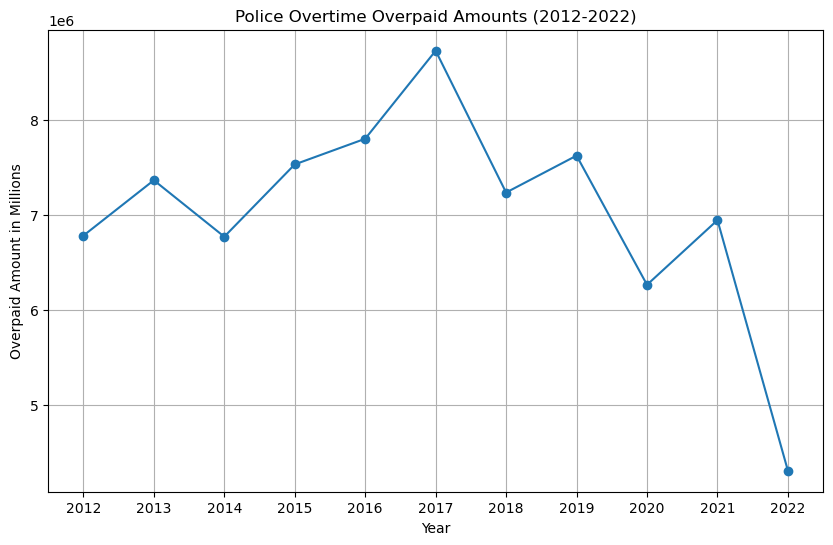

In [74]:
import matplotlib.pyplot as plt

# Assuming you have variables like Overpaid_money_2012, Overpaid_money_2013, ..., Overpaid_money_2022
years = list(range(2012, 2023))
overpaid_amounts = [Overpaid_money_2012, Overpaid_money_2013, Overpaid_money_2014, Overpaid_money_2015, Overpaid_money_2016, Overpaid_money_2017, Overpaid_money_2018, Overpaid_money_2019, Overpaid_money_2020, Overpaid_money_2021, Overpaid_money_2022]  # Fill in the actual values for each year

# Plotting the line chart
plt.figure(figsize=(10, 6))
plt.plot(years, overpaid_amounts, marker='o', linestyle='-')
plt.title('Police Overtime Overpaid Amounts (2012-2022)')
plt.xlabel('Year')
plt.ylabel('Overpaid Amount in Millions')
plt.xticks(years)  # Set x-axis ticks to include all years
plt.grid(True)
plt.show()
